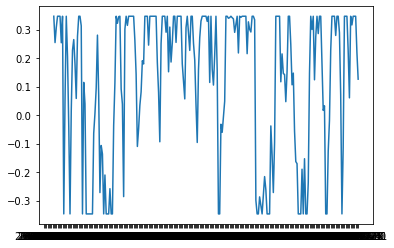

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
data=pd.read_csv("stock_prices.csv")
# def get_basics(high, low, lookback):
#     LowestLow=low.rolling(lookback).min()
#     HighestHigh=high.rolling(lookback).max()
#     return LowestLow,HighestHigh
def get_basics(mp, lookback):
    LowestLow=mp.rolling(lookback).min()
    HighestHigh=mp.rolling(lookback).max()
    return LowestLow,HighestHigh
data['val']=0
data['fisher']=0
data['MP'] = (data.High+data.Low)/2
data['lowestlow'] = pd.DataFrame(get_basics(data['MP'],9 )[0]).rename(columns = {0:'lowestlow'})
data['highesthigh'] = pd.DataFrame(get_basics(data['MP'],9 )[1]).rename(columns = {0:'highesthigh'})


# data['val']=2/3*((data.MP-data.lowestlow)/(data.highesthigh-data.lowestlow)-0.5)+2/3*data['val'].shift(1)
# data['fisher']=1/2*(np.log((1 + data.val) / (1 - data.val)))+1/2*data['fisher'].shift(1)

data['val']=2/3*((data.MP-data.lowestlow)/(data.highesthigh-data.lowestlow)-0.5)+2/3*list(data['val'])[-1]
data['fisher']=1/2*(np.log((1 + data.val) / (1 - data.val)))+1/2*list(data['fisher'])[-1]
data.dropna()
plt.plot(data.Date, data.fisher, label= 'Fisher Transformation')
plt.show()

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

#
stock = pd.read_csv('stock_prices.csv')
#
high = stock.High
low = stock.Low
#
high_low_df = (high + low) / 2
high_low = high_low_df.to_list()
#
maximum = []
minimum = []
for i in range(8, 253):
    maximum.append(max(high_low[i:i - 8:-1]))
    minimum.append(min(high_low[i:i - 8:-1]))
#
minimum
val_one = (2 / 3) * ((high_low[8] - minimum[0]) / (maximum[0] - minimum[0]) - 0.5)

value_t = [val_one]
for j in range(1, 245):
    val_temp = (2 / 3) * ((high_low[8 + j] - minimum[j]) / (maximum[j] - minimum[j]) - 0.5)
    value_t.append(val_temp + (2 / 3) * value_t[-1])
value_t
# #
# fisher_one = (1 / 2) * math.log((1 + value_t[0]) / (1 - value_t[0]))
# fisher_t = [fisher_one]
# for k in range(1, 245):
#     fisher_temp = (1 / 2) * np.log((1 + value_t[k]) / (1 - value_t[k]))
#     fisher_t.append(fisher_temp + (1 / 2) * fisher_t[-1])
# fisher_t

# plt.plot(stock.Date[8:], fisher_t)
# plt.show()

[0.3333333333333333,
 0.4711189861362929,
 0.6059583372655091,
 0.737305558177006,
 0.824870372118004,
 0.8832469147453359,
 0.8084233125300538,
 0.8722822083533692,
 0.24818813890224617,
 0.21614782232316093,
 0.4774318815487739,
 0.5208659587538962,
 0.30693293940787186,
 -0.12871137372808542,
 -0.06989632861910428,
 0.17695086052845743,
 0.37671827824069365,
 0.4287506793781446,
 0.3934362836961527,
 0.531353138815581,
 0.6875687592103873,
 0.7917125061402581,
 0.8263268256344012,
 0.21755121708960073,
 0.25921372934550985,
 0.21203719237785398,
 -0.19197520508143068,
 -0.46131680338762043,
 -0.6408778689250803,
 -0.7605852459500535,
 -0.8403901639667022,
 -0.893593442644468,
 -0.6553143898623264,
 -0.38880179918582974,
 0.0741321338761135,
 0.32261972407699063,
 0.2841218622726496,
 -0.07579462829765327,
 -0.15681856429779445,
 -0.2936992724662916,
 -0.529132848310861,
 -0.559852217587586,
 -0.7065681450583906,
 -0.8043787633722603,
 -0.8695858422481735,
 -0.8322108989085305,
 -0.8